In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Wrangling : creates indexed dict with compiled data from files listed
files = ['actions_taken', 'basic_details', 'basis_of_search', 'basis_property_seizure', 'disability', 'evidence_found', 'gender', 'property_seized', 'race', 'reason_for_stop', 'stop_result']

def getFileData( filename ) :
    data = csv.reader(open('Data/' + filename + '.csv'))
    fields = data.__next__()
    rows = {}
    for (index, row) in enumerate(data) :
        items = zip(fields, row)
        item = {}
        for (name, value) in items :
            item[name] = value.strip()
        rows[index] = item
    return rows

def getFileData( filename ) :
    data = csv.reader(open("Data/" + filename + '.csv'))
    fields = data.__next__()
    rows = {}
    for (index, row) in enumerate(data) :
        items = zip(fields, row)
        item = {}
        for (name, value) in items :
            item[name] = value.strip()
        rows[index] = item
    return rows

def getUidDict( files ) :
    uid_dict = {}
    for file in files :
        fileData = getFileData( file )
        for rowIndex in fileData :
            row = fileData[rowIndex]
            stop_id = row['stop_id']
            pid = row['pid']
            uid = stop_id + "_" + pid
            uid_dict[uid] = {}
    for file in files :
        fileData = getFileData( file )
        for rowIndex in fileData :
            row = fileData[rowIndex]
            stop_id = row['stop_id']
            pid = row['pid']
            uid = stop_id + "_" + pid
            for field in row :
                uid_dict[uid][field] = row[field]
    return uid_dict

def getIndexedDict( uid_dict ) :
    dict = {}
    for (index, uid) in enumerate( uid_dict ) :
        dict[index] = uid_dict[ uid ]
        dict[index]['uid'] = uid
    return dict


data = pd.DataFrame(getIndexedDict( getUidDict(files)))
data = data.T


# ## 1.3 Take a look at the data

# In[4]:


data.head(7).T


# ## 1.4 All the rows

# In[5]:


# show basic infomation of data
data.info()


# ## 2.1 Brief introduction to data
# 1. count  - how many rows in the data
# 2. unique - number of different values
# 3. top    - largest value
# 4. freq   - count of top value

df = data.copy(deep=True)
df = df.drop(["agency","ori"],axis = 1)
print("data.columns:" + str(len(data.columns)))
print("df.columns:" + str(len(df.columns)))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 89470 entries, 0 to 89469
Data columns (total 49 columns):
action                          89470 non-null object
agency                          89470 non-null object
assignment                      89470 non-null object
basis_for_search                89470 non-null object
basis_for_search_explanation    89470 non-null object
basisforpropertyseizure         89470 non-null object
beat                            89470 non-null object
beat_name                       89470 non-null object
block                           89470 non-null object
cityname                        89470 non-null object
code                            89470 non-null object
consented                       89470 non-null object
contraband                      89470 non-null object
disability                      89470 non-null object
exp_years                       89470 non-null object
gend                            89470 non-null object
gend_nc                    

Text(0.5,1,'Time Distribution')

In [3]:
df = data.copy(deep=True)

In [5]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,89460,89461,89462,89463,89464,89465,89466,89467,89468,89469
action,None,None,Curbside detention,Curbside detention,None,Search of person was conducted,Handcuffed or flex cuffed,Handcuffed or flex cuffed,None,Handcuffed or flex cuffed,...,None,None,None,Handcuffed or flex cuffed,Handcuffed or flex cuffed,Patrol car detention,Handcuffed or flex cuffed,Handcuffed or flex cuffed,Physical or Vehicle contact,None
agency,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,...,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD
assignment,"Patrol, traffic enforcement, field operations","Patrol, traffic enforcement, field operations",Other,Other,"Patrol, traffic enforcement, field operations","Patrol, traffic enforcement, field operations",Other,"Patrol, traffic enforcement, field operations",Gang enforcement,"Patrol, traffic enforcement, field operations",...,"Patrol, traffic enforcement, field operations","Patrol, traffic enforcement, field operations","Patrol, traffic enforcement, field operations","Patrol, traffic enforcement, field operations","Patrol, traffic enforcement, field operations","Patrol, traffic enforcement, field operations","Patrol, traffic enforcement, field operations","Patrol, traffic enforcement, field operations","Patrol, traffic enforcement, field operations","Patrol, traffic enforcement, field operations"
basis_for_search,,,,,,Incident to arrest,,Incident to arrest,,,...,,,,,Incident to arrest,Incident to arrest,Officer Safety/safety of others,,Incident to arrest,
basis_for_search_explanation,,,,,,subject was transported to detox and was searc...,,INCIDENT TO ARREST,,,...,,,,,searched incident to arrest,arrested for dui,Parolee at large,,search before transport,
basisforpropertyseizure,,,,,,,,Impound of vehicle,,,...,,,,,,,Safekeeping as allowed by law/statute,,,
beat,122,121,822,822,614,115,122,446,826,122,...,521,521,521,523,617,324,832,523,523,122
beat_name,Pacific Beach 122,Mission Beach 121,El Cerrito 822,El Cerrito 822,Ocean Beach 614,University City 115,Pacific Beach 122,Lincoln Park 446,Colina Del Sol 826,Pacific Beach 122,...,East Village 521,East Village 521,East Village 521,Gaslamp 523,Wooded Area 617,Lake Murray 324,Teralta West 832,Gaslamp 523,Gaslamp 523,Pacific Beach 122
block,700,,4400,4400,4800,4500,800,4800,4100,1100,...,600,600,700,800,700,6600,4300,800,900,4800
cityname,SAN DIEGO,SAN DIEGO,SAN DIEGO,SAN DIEGO,SAN DIEGO,SAN DIEGO,SAN DIEGO,SAN DIEGO,SAN DIEGO,SAN DIEGO,...,SAN DIEGO,SAN DIEGO,SAN DIEGO,SAN DIEGO,SAN DIEGO,SAN DIEGO,SAN DIEGO,SAN DIEGO,SAN DIEGO,SAN DIEGO


## A1 Relationship between age and crime
### 1.1 age distribution

In [128]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

In [51]:
df = data['perceived_age'].copy(deep=True)

In [52]:
#convert to int
for i in range(len(df)):
    df.at[i] = int(df[i])
df.describe()

count     89470
unique      105
top          30
freq      12594
Name: perceived_age, dtype: int64

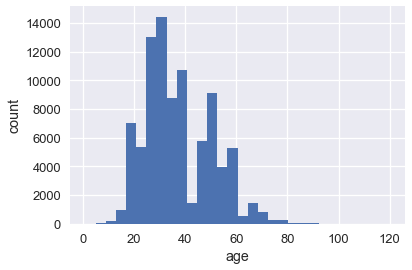

In [54]:
plt.figure();
df.plot.hist(bins = 30);
plt.xlabel('age');
plt.ylabel('count');

### 1.2 age - crime type
We split age into different groups
1. 19- , 1
1. 20-29 , 2
1. 30-39 , 3
1. 40-49 , 4
1. 50+ , 5

In [92]:
stop_words = {'i', 'me', 'am', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

In [134]:
wordDic = dict()

def sentence2dic(s):
    
    s = s.lower()
    s = s.replace('.','')
    s = s.replace('\'','')
    s = s.replace('/','')
    s = s.replace('\\','')
    words = s.split()
    
    for word in words:
        if word in stop_words:
            continue
        if '0' in word:
            continue
        if '1' in word:
            continue
        if '2' in word:
            continue
        if '3' in word:
            continue
        if '4' in word:
            continue
        if '5' in word:
            continue
        if '6' in word:
            continue
        if '7' in word:
            continue
        if '8' in word:
            continue
        if '9' in word:
            continue
            
        if word in wordDic:
            wordDic[word]+=1
        else :
            wordDic[word] = 1

def cleanStr(s):
    s = s.lower()
    s = s.replace('/','')
    s = s.replace('\\','')
    s = s.replace('\'','')
    s = s.replace('#','')
    s = s.replace('.','')
    s = s.replace(',','')
    
    return s
    

In [139]:
df = data.copy(deep=True)
df['reason_for_stop_explanation'] = df['reason_for_stop_explanation'].apply(cleanStr)

In [136]:
pd.DataFrame(df['reason_for_stop'].value_counts())

,reason_for_stop
reasonable suspicion,42492
traffic violation,40405
consensual encounter resulting in a search,2190
investigation to determine whether the person was truant,1917
known to be on parole probation prcs mandatory supervision,1430
knowledge of outstanding arrest warrantwanted person,1030
possible conduct warranting discipline under education code sections 48900 489002 489003 489004 and 489007,3
determine whether the student violated school policy,3


In [76]:
pd.DataFrame(df['reason_for_stop_code_text'].value_counts())

,reason_for_stop_code_text
,6572
22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,6009
65002 ZZ - LOCAL ORDINANCE VIOL (I) 65002,4606
647(E) PC - DIS CON:LODGE W/O CONSENT (M) 32111,4191
602 PC - TRESPASSING (M) 32022,3812
22450(A) VC - FAIL STOP VEH:XWALK/ETC (I) 54167,3315
65000 ZZ - LOCAL ORDINANCE VIOL (M) 65000,2663
23123.5 VC - NO HND HLD DEVICE W/DRIVE (I) 54655,2526
647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,2488
21461(A) VC - DRIVER FAIL OBEY SIGN/ETC (I) 54146,2258


In [75]:
df_reasonable = df[df['reason_for_stop'] == 'Reasonable Suspicion']
len(df_reasonable)

42492

In [205]:
df_traffic = df[df['reason_for_stop'] == 'Traffic Violation']
# pd.DataFrame(df_traffic['reason_for_stop_explanation'].value_counts())

## Here I generalize some classes for traffic violation
1. speeding
2. resictration violation
3. helmet
4. phone / text
5. traffic sign
6. plate
7. turn
8. container
9. scooter
10. lane


In [206]:
def categorizeType(s):
    violationDic = {
        'speeding' : ['speed','fast'],
        'expire or fake liscence' : ['exp','reg','lisence'],
        'helmet' : ['helmet'],
        'phone' : ['phone','text','call','wireless','cell','mobile'],
        'sign' : ['sign'],
        'plate' : ['plate'],
        'turn' : ['turn'],
        'container' : ['container','open'],
        'scooter' : ['scooter'],
        'bike' : ['bike'],
        'sidewalk' : ['sidewalk','side'],
        'lane' : ['lane','wrong way','line','yellow'],
        'tinted window' : ['tint'],
        'red light' : ['red'],
        'traffic jam' : ['busy','jam','traffic'],
        'jaywalking' : ['jaywalking'],
        'seatbelt' : ['seatbelt','belt'],
        'stopping violation' : ['stop','tstop','lodging'],
        'unsafe movement' : ['unsafe','reckless'],
        'driving equipment violaiton' : ['equip'],
        'alcohol' : ['alchol','wine' ,'drink' ,'drunk','alcohol'],
        'highway voilation' : ['hwy','high'],
        'passenger' : ['passenger'],
        'sleep' : ['island','sleep'],
        'hands free' : ['hand','off'],
        'collision' : ['collis' ,'hit' , 'crash'],
        'car problem' : ['crack' ,'broken','light','noise','loud']
    }
    
    for key in violationDic:
        for word in violationDic[key]:
            if word in s:
                return '*'+key+'*'
    
    return '*others*'

df_traffic['reason_for_stop_explanation'] = df_traffic['reason_for_stop_explanation'].apply(categorizeType)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [209]:
pd.DataFrame(df_traffic['reason_for_stop_explanation'].value_counts())

,reason_for_stop_explanation
*speeding*,5536
*sign*,5472
*phone*,3945
*others*,3763
*expire or fake liscence*,3374
*car problem*,3237
*red light*,2117
*plate*,1899
*turn*,1517
*lane*,1232
